In [ ]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/Colab Notebooks/Data-Analytics-data-2024-2024-1016

Mounted at /gdrive
/gdrive/MyDrive/Colab Notebooks/Data-Analytics-data-2024-2024-1016


# Linear regression &ndash; several variables




In [ ]:
## Import the necessary libraries.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
### Open the data and read it in a dataframe.

df =  pd.read_excel('ENB2012_data.xlsx')

df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


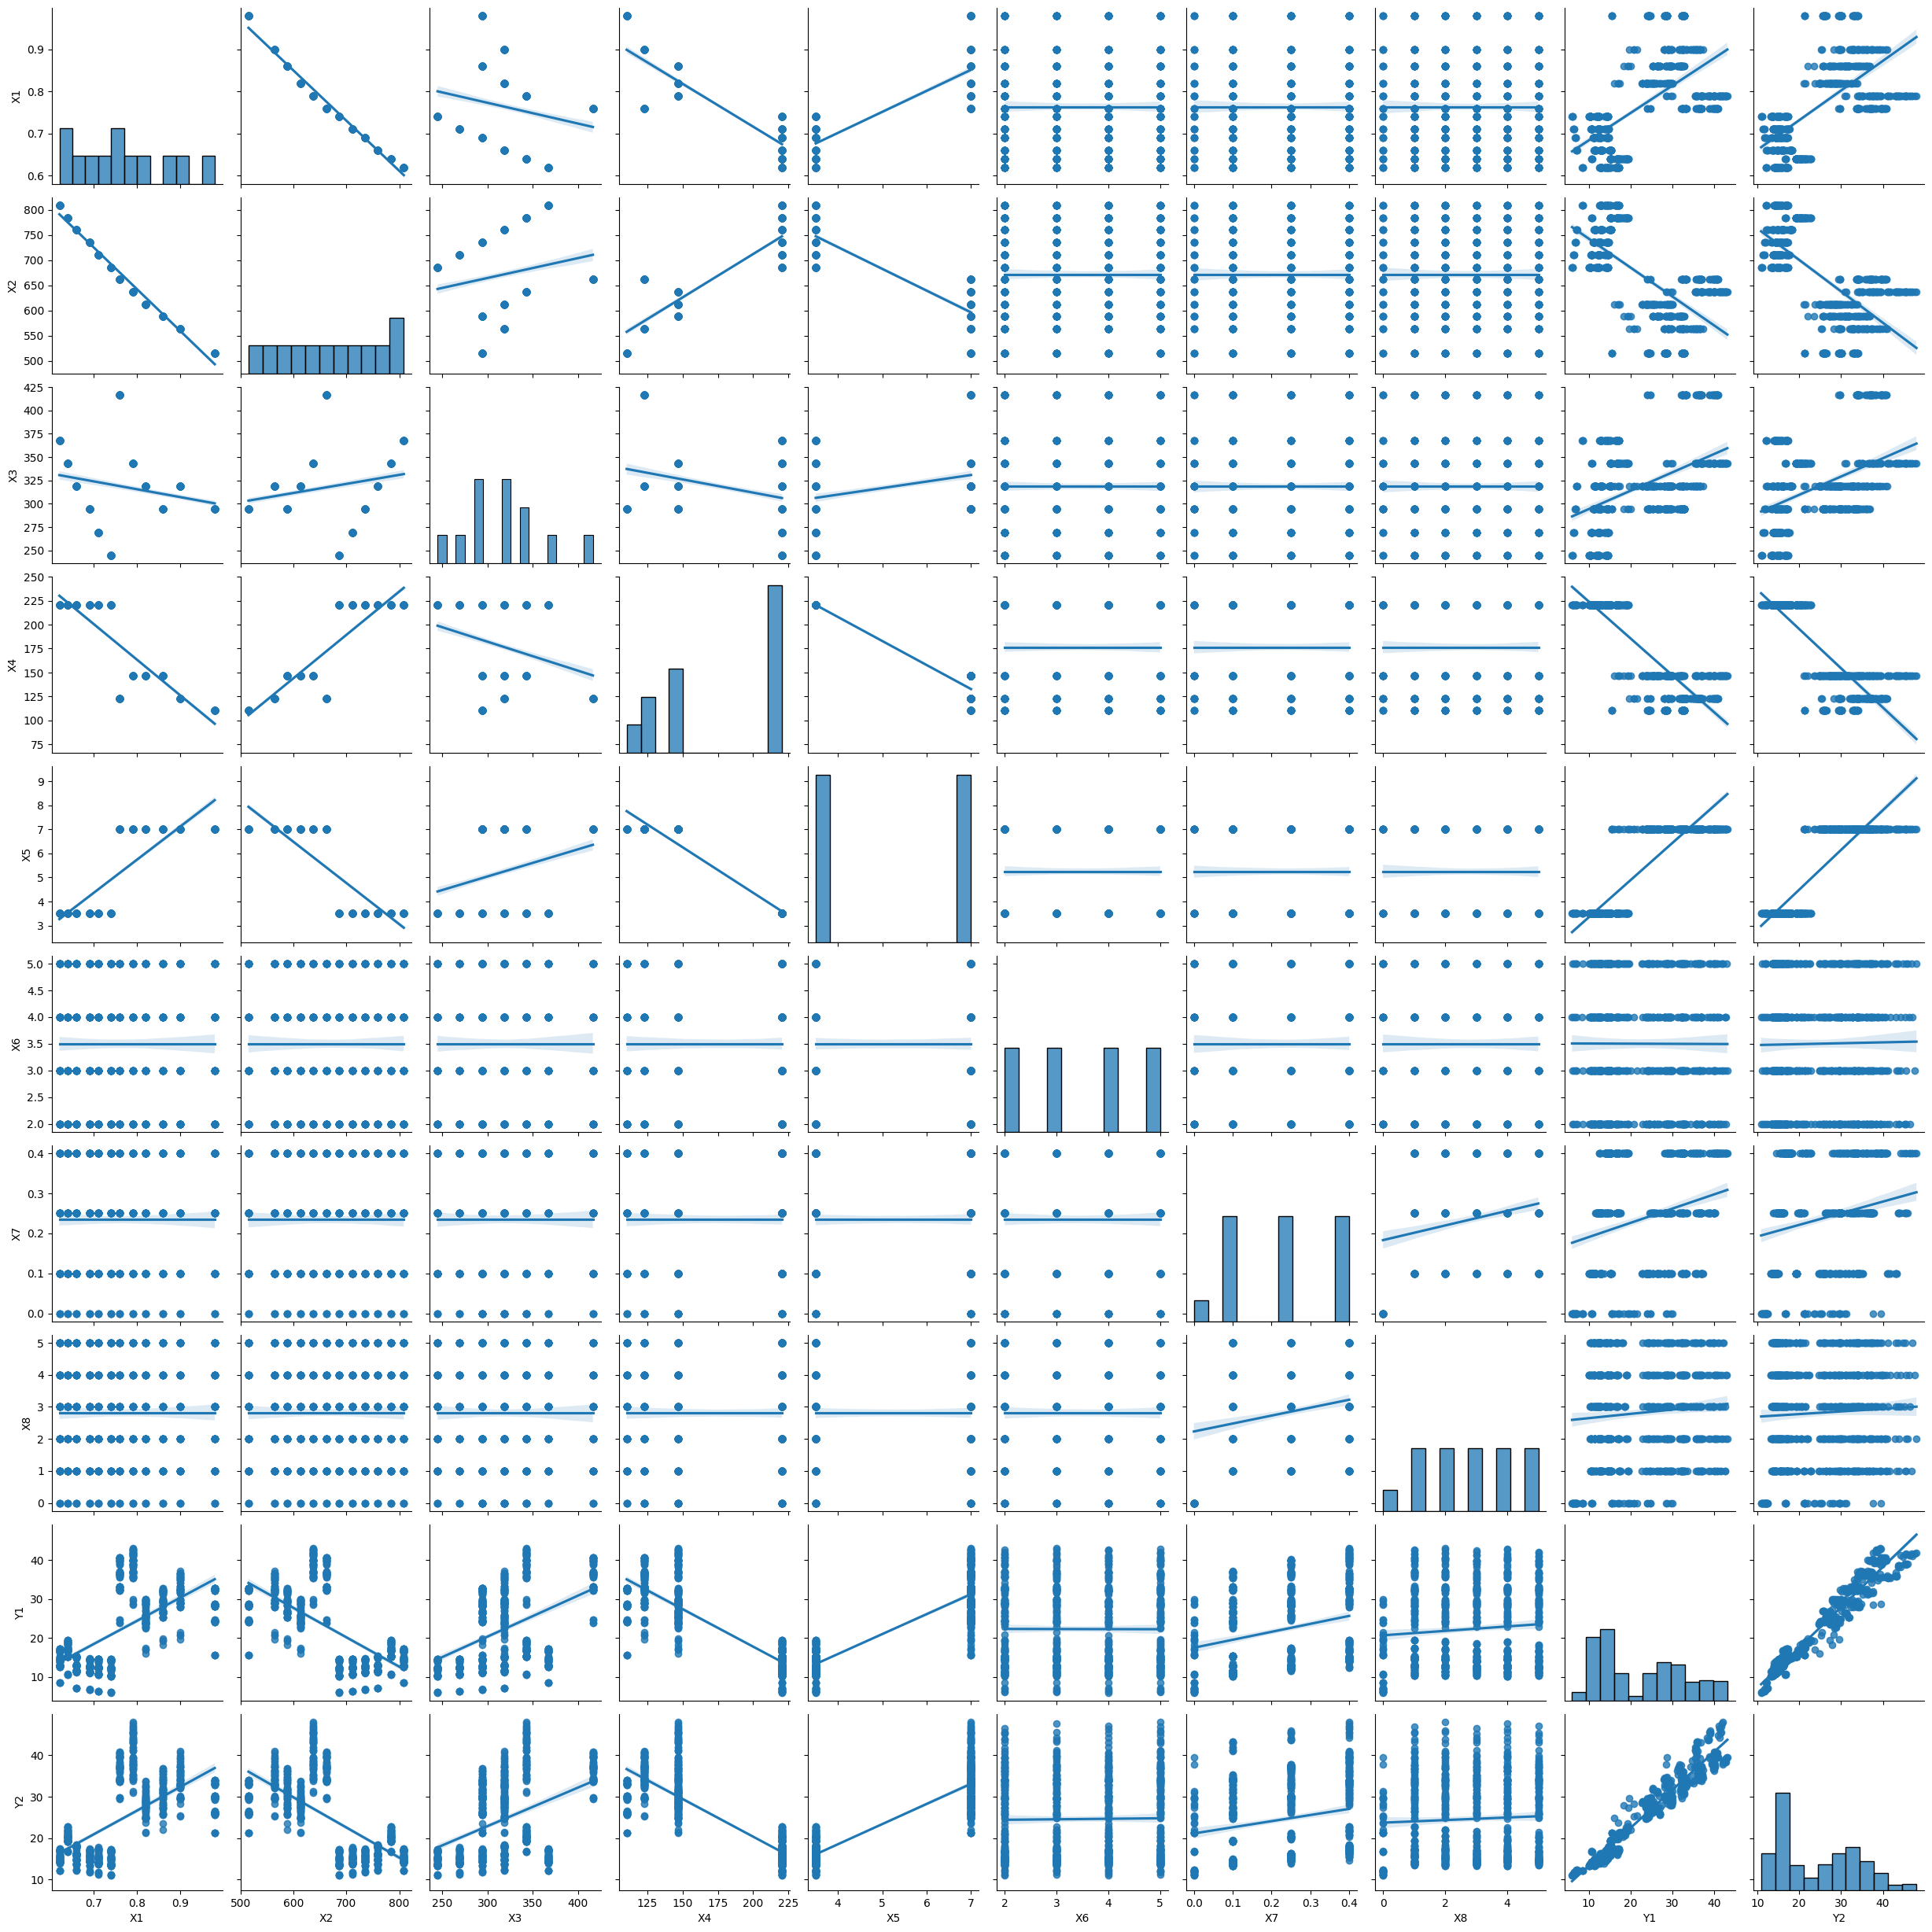

In [ ]:
### Study dependencies between the column variables of the data using scatter charts of the seaborn library.

sns.pairplot(df, kind='reg')

<Axes: >

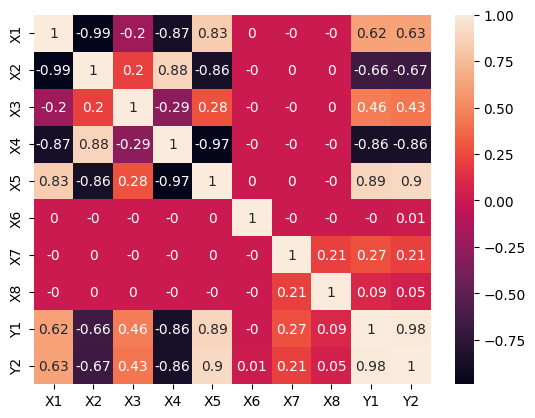

In [ ]:
### Study dependencies between the column variables of the data using correlation coefficients.

correlation_matrix = df.corr().round(2)

### We color the coefficients background color using the heatmat function of the seaborn library.

sns.heatmap(data = correlation_matrix, annot = True)

In [ ]:
### prepare the data for regression analysis.

### Feature matrix X

X = df[['X1', 'X2', 'X3', 'X4', 'X5']]

# Target variable for Heating Load (Y1)
y1 = df['Y1']  # Heating Load

# Target variable for Cooling Load (Y2)
y2 = df['Y2']  # Cooling Load


X1, X2, X3, X4, X5 are selected as independent variables based on the fact that they have a high correlation with the target variables Y1 (Heating Load) and Y2 (Cooling Load). So, since the correlation coefficients are high, it is likely that these variables can explain a significant portion of the variation in the target variables (Y1 and Y2), meaning they have a strong influence on the heating and cooling loads of the building.

In [ ]:
# Split data into training and testing sets
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)
_, _, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)

In [ ]:
### Import the linear regression model

from sklearn.linear_model import LinearRegression

### Fit the model into the data.

model1 = LinearRegression().fit(X, y1)
model2 = LinearRegression().fit(X, y2)

In [ ]:
### Slope of the regression line.

model1.coef_

array([-6.58236690e+01, -1.77021203e+12,  1.77021203e+12,  3.54042405e+12,
        4.17980003e+00])

In [ ]:
model2.coef_

array([-7.14655369e+01, -1.14250638e+12,  1.14250638e+12,  2.28501276e+12,
        4.29062653e+00])

For Heating Load (Y1), the coefficients indicate how each feature (Relative Compactness, Surface Area, Wall Area, Roof Area, Overal Height) positively influences the heating load, with relatively interpretable values. For Cooling Load (Y2), the coefficients are unusually large

In [ ]:
### Intercept of the regression line.

model1.intercept_

91.23824513626099

In [ ]:

model2.intercept_

102.49947115580241

In [ ]:
### R squared value

model1.score(X, y1)

0.8423549343274505

In [ ]:
model2.score(X, y2)

0.8446235844778635

The R² values for both models are **high**, with 0.84 for Heating Load (Y1) and 0.84 for Cooling Load (Y2), indicating that the models explain a significant portion of the variance in the target variables. These results suggest that the selected features are strong predictors for both heating and cooling loads

Text(0, 0.5, 'Deviation from the realized values')

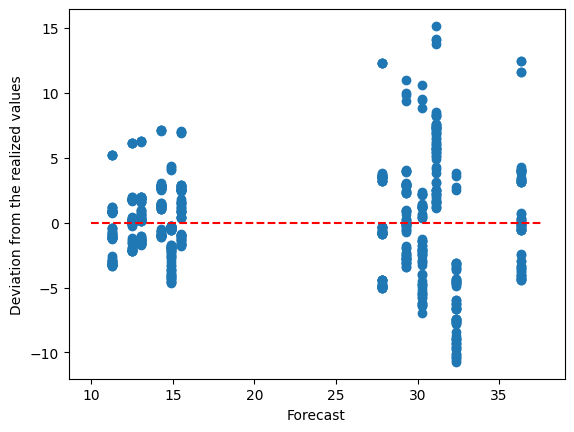

In [ ]:
### Error values of the model 1 as scatter chart.

plt.scatter(model1.predict(X), model1.predict(X)-y1)

# Get the x-axis limits of the plot
x_min, x_max = plt.xlim()

# Add a horizontal line at zero deviation
plt.hlines(y=0, xmin=x_min, xmax=x_max, colors='r', linestyles='--')

### Add axis names.

plt.xlabel('Forecast')
plt.ylabel('Deviation from the realized values')

Text(0, 0.5, 'Deviation from the realized values')

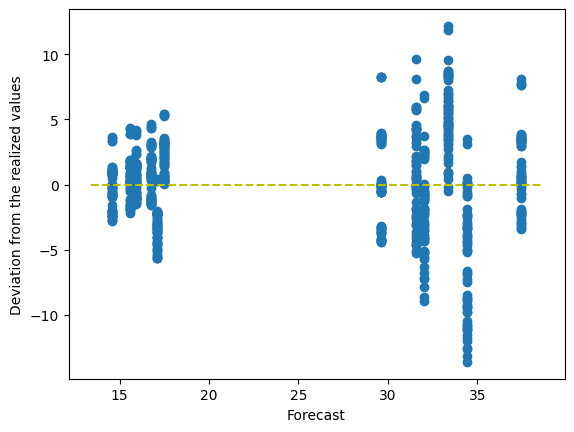

In [ ]:
### Error values of the model 2 as scatter chart.

plt.scatter(model2.predict(X), model2.predict(X)-y2)

# Get the x-axis limits of the plot
x_min, x_max = plt.xlim()

# Add a horizontal line at zero deviation
plt.hlines(y=0, xmin=x_min, xmax=x_max, colors='y', linestyles='--')

### Add axis names.

plt.xlabel('Forecast')
plt.ylabel('Deviation from the realized values')

Text(0, 0.5, 'Forecast')

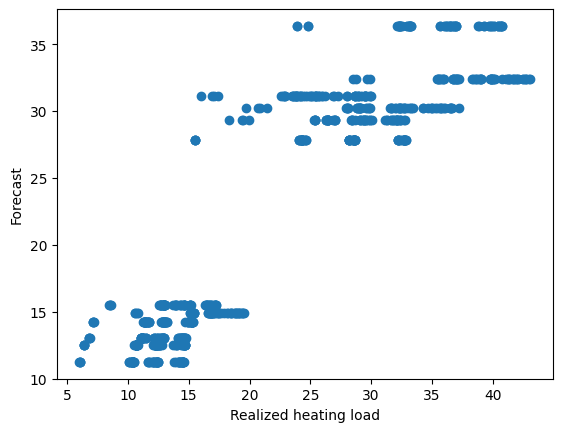

In [ ]:
### Correspondence between realized heating load and predictions by the model as a scatter chart.

plt.scatter(y1, model1.predict(X))

plt.xlabel('Realized heating load')
plt.ylabel('Forecast')

Text(0, 0.5, 'Forecast')

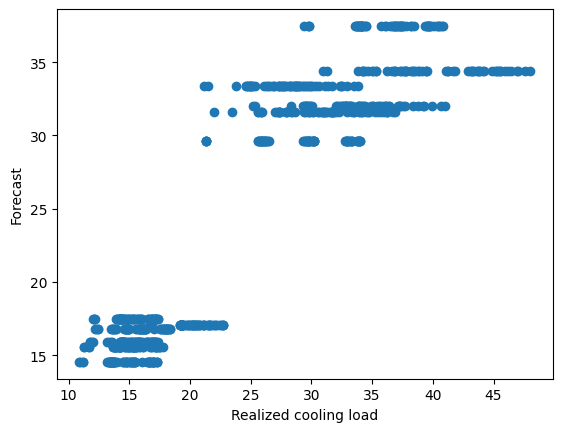

In [ ]:
### Correspondence between realized cooling load and predictions by the model as a scatter chart.

plt.scatter(y2, model2.predict(X))

plt.xlabel('Realized cooling load')
plt.ylabel('Forecast')

The scatter plot indicates that the model's predictions are generally accurate, with most points clustering around the line of perfect agreement (y=x). However, there's a tendency for the model to underpredict higher heating loads and overpredict lower heating loads.

In [ ]:
### More usual regression statistics from the statsmodel library.

import statsmodels.api as sm

### Add constant term to the independent variables matrix


X = sm.add_constant(X)

### Fitting the model using the ordinary least squares method

model_sm = sm.OLS(y1, X).fit()

print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                     Y1   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     1020.
Date:                Mon, 18 Nov 2024   Prob (F-statistic):          2.14e-304
Time:                        20:51:53   Log-Likelihood:                -2154.9
No. Observations:                 768   AIC:                             4320.
Df Residuals:                     763   BIC:                             4343.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         89.1766     26.041      3.424      0.0

The OLS regression model explains **84.2%** of the variation in heating load, with X1, X2, X3, X4, and X5 all being statistically significant predictors. The model's fit is strong, but the Durbin-Watson statistic suggests potential autocorrelation in the residuals, and the high condition number points to possible multicollinearity.

In [ ]:
# Add constant term to the independent variables matrix
X = sm.add_constant(X)

# Fit the OLS regression model for Cooling Load (y2)
model_sm2 = sm.OLS(y2, X).fit()

# Print the model summary
print(model_sm2.summary())

                            OLS Regression Results                            
Dep. Variable:                     Y2   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     1036.
Date:                Mon, 18 Nov 2024   Prob (F-statistic):          1.43e-306
Time:                        20:51:58   Log-Likelihood:                -2104.6
No. Observations:                 768   AIC:                             4219.
Df Residuals:                     763   BIC:                             4243.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.2348     24.392      4.150      0.0

The OLS regression model for cooling load (Y2) explains **84.4%** of the variation in the data. X1, X2, X3, X4, and X5 are all significant predictors, with X1 and X5 showing strong coefficients. However, the Durbin-Watson statistic also indicates some potential autocorrelation in the residuals, and the high condition number suggests multicollinearity might be present in the model.

# Comparing regression models


In [ ]:
### Importing more libraries

### train_test_split can split data into train data and test data

from sklearn.model_selection import train_test_split

### Models used

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Assessing the accuracy of the models

from sklearn.metrics import r2_score

## Function for model fitting and review

In [ ]:
# Initialize lists to store R² values and model names
R2_train = []
R2_test = []
methods = []

In [ ]:
def modeling(model, X_train, X_test, y_train, y_test, model_name):
    # Fitting the model to train data
    model.fit(X_train, y_train)

    # The coefficient of determination (R²) for train data
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train, y_pred_train)
    R2_train.append(round(R2_train_model, 2))

    # The coefficient of determination (R²) for test data
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test, y_pred_test)
    R2_test.append(round(R2_test_model, 2))

    # Printing the coefficients of determination
    print("The coefficient of determination (R²) for train data :", round(R2_train_model, 2))
    print("The coefficient of determination (R²) for test data :", round(R2_test_model, 2))

    # Train data error terms as a chart
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    ax[0].set_title('Distribution of prediction errors in train data')
    sns.histplot((y_train - y_pred_train), kde=True, ax=ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')

    # Realized and predicted as scatter chart for test data
    ax[1].set_title('Realized and predicted in test data')
    ax[1].scatter(x=y_test, y=y_pred_test)
    ax[1].set_xlabel('realized')
    ax[1].set_ylabel('forecast')
    plt.show()

    # Adding the model name to the methods list
    methods.append(model_name)


##Linear Regression Model

Heating Load (Y1):
The coefficient of determination (R²) for train data : 0.84
The coefficient of determination (R²) for test data : 0.85


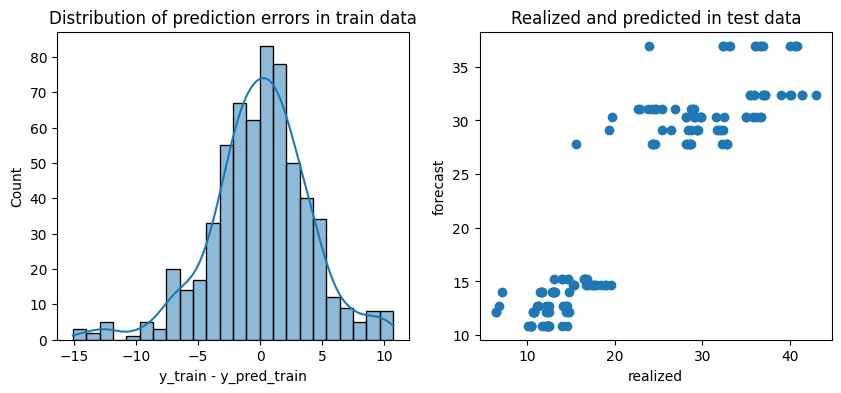

Cooling Load (Y2):
The coefficient of determination (R²) for train data : 0.84
The coefficient of determination (R²) for test data : 0.85


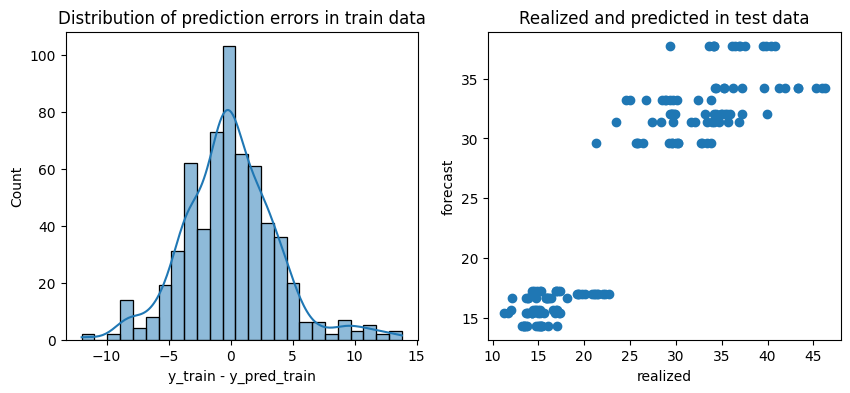

In [ ]:
# Heating Load (Y1)
model = LinearRegression()
print("Heating Load (Y1):")
modeling(model, X_train, X_test, y1_train, y1_test, "Linear Regression")

# Cooling Load (Y2)
print("Cooling Load (Y2):")
modeling(model, X_train, X_test, y2_train, y2_test, "Linear Regression")

## Random Forest

Heating Load (Y1):
The coefficient of determination (R²) for train data : 0.91
The coefficient of determination (R²) for test data : 0.91


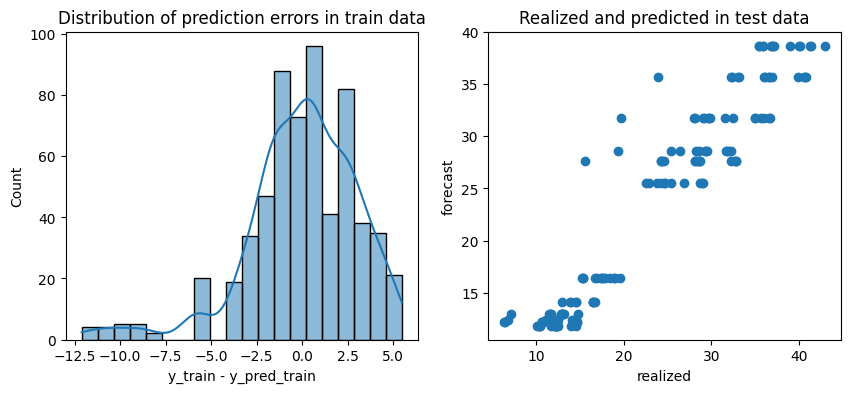

Cooling Load (Y2):
The coefficient of determination (R²) for train data : 0.92
The coefficient of determination (R²) for test data : 0.92


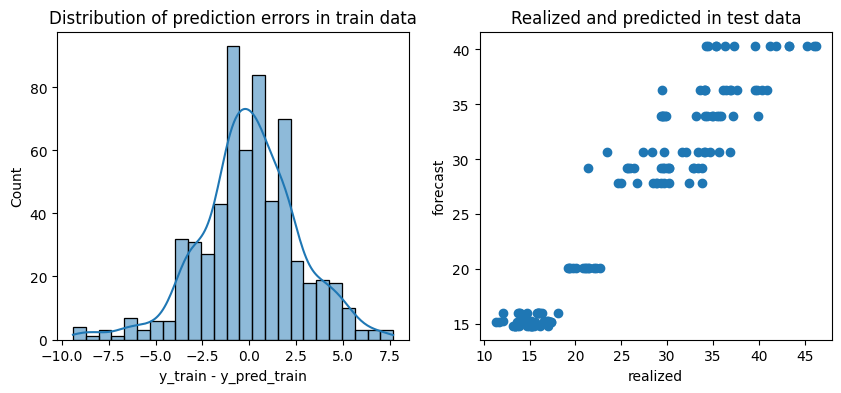

In [ ]:
# Heating Load (Y1)
model = RandomForestRegressor()
print("Heating Load (Y1):")
modeling(model, X_train, X_test, y1_train, y1_test, "Random Forest")

# Cooling Load (Y2)
print("Cooling Load (Y2):")
modeling(model, X_train, X_test, y2_train, y2_test, "Random Forest")

## Gradient Boosting

Heating Load (Y1):
The coefficient of determination (R²) for train data : 0.91
The coefficient of determination (R²) for test data : 0.91


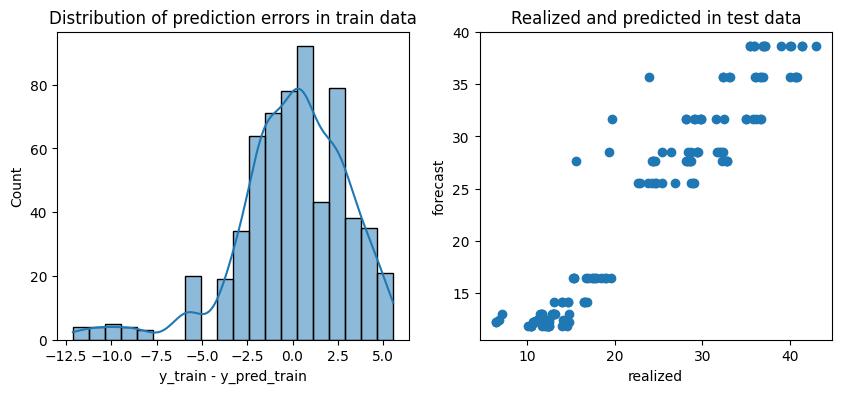

Cooling Load (Y2):
The coefficient of determination (R²) for train data : 0.92
The coefficient of determination (R²) for test data : 0.92


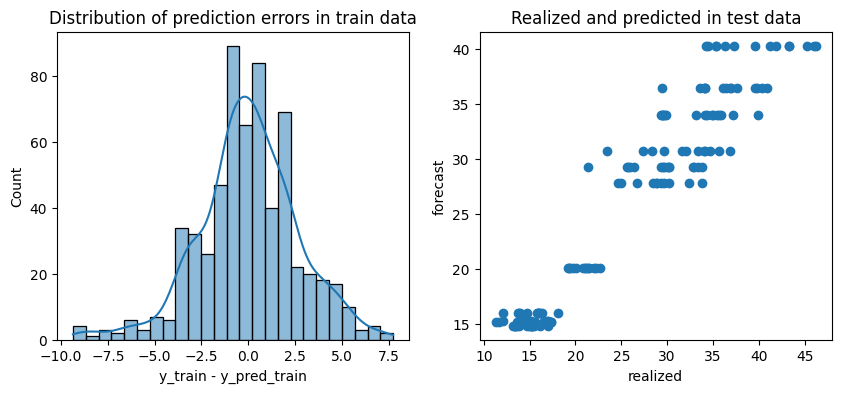

In [ ]:
# Heating Load (Y1)
model = GradientBoostingRegressor()
print("Heating Load (Y1):")
modeling(model, X_train, X_test, y1_train, y1_test, "Gradient Boosting")

# Cooling Load (Y2)
print("Cooling Load (Y2):")
modeling(model, X_train, X_test, y2_train, y2_test, "Gradient Boosting")

# Summary

In [ ]:
summary_df = pd.DataFrame({
    'Model': methods,
    'The coefficient of determination (train data)': R2_train,
    'The coefficient of determination (test data)': R2_test
})

# Display the comparison
print("\n--- Model Comparison Summary ---")
print(summary_df)


--- Model Comparison Summary ---
               Model  The coefficient of determination (train data)  \
0  Linear Regression                                           0.84   
1  Linear Regression                                           0.84   
2  Linear Regression                                           0.84   
3      Random Forest                                           0.91   
4      Random Forest                                           0.92   
5  Gradient Boosting                                           0.91   
6  Gradient Boosting                                           0.92   

   The coefficient of determination (test data)  
0                                          0.85  
1                                          0.85  
2                                          0.85  
3                                          0.91  
4                                          0.92  
5                                          0.91  
6                                          0.92

1. **Linear Regression**:

Training R²: 0.84 | Testing R²: 0.85

Linear Regression performs reasonably well, explaining about 84-85% of the variance in both training and testing data. The similar R² values suggest it generalizes decently, but it’s outperformed by more advanced models.


2.   **Random Forest**:


Training R²: 0.91 (Y1), 0.92 (Y2) | Testing R²: 0.91 (Y1), 0.92 (Y2)


Random Forest offers a significant boost in performance, with R² values around 0.91-0.92 for both training and testing. It shows strong generalization and doesn't overfit, making it a solid choice.

3. **Gradient Boosting**:

Training R²: 0.91 (Y1), 0.92 (Y2) | Testing R²: 0.91 (Y1), 0.92 (Y2)


Gradient Boosting matches Random Forest in performance, also achieving high R² values and generalizing well. It’s a reliable alternative but may be computationally more demanding.

**Random Forest** and **Gradient Boosting** outweigh Linear Regression with R² values consistently above 0.90. Both models capture complex patterns better.

## Key findings

This analysis explored the relationship between building characteristics and energy consumption (heating and cooling loads). Using linear regression, random forest, and gradient boosting models, we found:

1. **Key Predictors:** Building compactness, surface area, wall area, roof area, and overall height significantly influence energy loads.
2. **Model Performance:** Random Forest and Gradient Boosting models achieved the highest accuracy, explaining over 90% of the variation in both heating and cooling loads. Linear Regression performed adequately but was outperformed by the other two.
3. **Insights:** The selected building features are strong predictors of energy consumption. Employing advanced models like Random Forest or Gradient Boosting can enhance prediction accuracy for optimizing building energy efficiency.